ValueError: x and y must be the same size

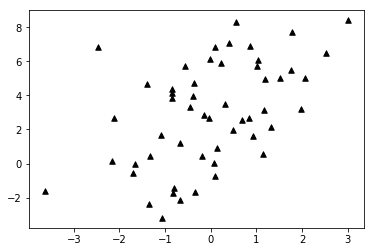

In [8]:
# coding:utf-8

import numpy as np

# 使用logistic回归在简单数据集上的分类
def load_data_set():
  """
  加载数据集
  :return:返回两个数组 普通数组
    data_arr - 原始数据的特征
    label_arr - 原始数据的标签,也就是每条样本对应的类别
  """
  data_arr = []
  label_arr = []
  f = open('data/TestSet.txt')
  for line in f.readlines():
    line_arr = line.strip().split()
    data_arr.append([1.0, np.float(line_arr[0]), np.float(line_arr[1])])
    label_arr.append(int(line_arr[2]))
  return data_arr, label_arr


def sigmoid(x):
  return 1.0/(1 + np.exp(-x))

def grad_ascent(data_arr, class_labels):
  """
  梯度上升法
  :param data_arr
  :param class_labels: class_labels
  :return:
  """
  data_mat = np.mat(data_arr)
  # 变成矩阵后进行转置
  label_mat = np.mat(class_labels).transpose()
  # m->数据量,样本数 n->特征值
  m, n = np.shape(data_mat)
  # 学习率: learning rate
  alpha = 0.001
  # 最大迭代次数 假装迭代
  max_cycles = 500
  # weights = np.ones((n, 1))
  weights = np.ones((n, 1))
  for k in range(max_cycles):
    h = sigmoid(data_mat * weights)
    error = label_mat - h
    weights = weights + alpha * data_mat.transpose()*error
  return weights

def plot_best_fit(weights):
  """
  可视化
  :param weights
  :return
  """
  import matplotlib.pyplot as plt
  data_mat, label_mat = load_data_set()
  data_arr = np.array(data_mat)
  n = np.shape(data_mat)[0]
  x_cord1 = []
  y_cord1 = []
  x_cord2 = []
  y_cord2 = []
  for i in range(n):
    if int(label_mat[i]) == 1:
      x_cord1.append(data_arr[i, 1])
      y_cord1.append(data_arr[i, 2])
    else:
      x_cord2.append(data_arr[i, 1])
      x_cord2.append(data_arr[i, 2])
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(x_cord1, y_cord1, s=30, color='k', marker='^')
  ax.scatter(x_cord2, y_cord2, s=30, color='red', marker='s')
  x = np.arrange(-3.0, 3.0, 0.1)
  y = (-weights[0] - weights[1]*x)/weights[2]
  ax.plot(x, y)
  plt.xlabel('x1')
  plt.ylabel('y1')
  plt.show()

    
def stoc_grad_ascent0(data_mat, class_labels):
    m, n = np.shape(data_mat)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(data_mat[i]*weights))
        error = class_labels[i] - h
        weights = weights + alpha*error*data_mat[i]
    return weights

def stoc_grad_ascent1(data_mat, class_labels, num_iter=150):
    m, n = np.shape(data_mat)
    weights = np.ones(n)
    for j in range(num_iter):
        data_index = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+ 0.01
            rand_index = int(np.random.uniform(0, len(data_index)))
            h = sigmoid(np.sum(data_mat[data_index[rand_index]] * weights))
            error = class_labels[data_index[rand_index]] - h
            weights = weights + alpha * error * data_mat[data_index[rand_index]]
            del(data_index[rand_index])
    return weights

def test():
 data_arr, class_labels = load_data_set()
 weights = stoc_grad_ascent0(np.array(data_arr), class_labels)
 #weights = stoc_grad_ascent1(np.array(data_arr), class_labels)
 
 plot_best_fit(weights)
 #data_arr, label_arr = load_data_set()
 #print (data_arr)
 #print (label_arr)
    
#------ 预测病马的死亡率 ---------
def classify_vector(int_x, weights):
    """
    desc:
     最终的分类函数,根据回归系数和特征向量来计算sigmoid的值,大于0.5函数就返回1 否则就返回0
    parameters:
     in_x 特征向量 features
     weights 根据梯度下降或者随机梯度下降 计算得出的回归系数
    return:
    """
    prob = sigmoid(np.sum(int_x * weights))
    if prob > 0.5:
        return 1.0
    return 0.0

def colic_test():
    """
    desc:
     打开测试集和训练集 并对数据进行格式化处理,最主要的部分,比如缺失值的补充
    """
    f_train = open(r'C:\Users\wd\Documents\GitHub\MachineLearningStudy\data\HorseColicTraining.txt', 'r')
    f_test  = open(r'C:\Users\wd\Documents\GitHub\MachineLearningStudy\data\HorseColicTest.txt', 'r')
    traing_set = []
    traing_labels = []
    # 解析训练数据集中的数据特征和labels
    for line in f_train.readlines():
        curr_line = line.strip().split('\t')
        if len(curr_line) == 1:
            continue
        line_arr = [float(curr_line[i]) for i in range(21)]
        traing_set.append(line_arr)
        traing_labels.append(float(curr_line[21]))
    #使用改进后的
    